In [231]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
from scipy import stats
from scipy.stats import zscore
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn. model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

%matplotlib inline

In [178]:
df=pd.read_csv('Housing.csv')
df.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


In [179]:
df.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


# Data Overview

**From the above information this is out Dataset Description:**
| __Variable__   | __Description__ |
|     :---       |       :---      |      
| price | Price of the property. |
| area | Area of the property. | 
| bedrooms |  Number of bedrooms in the property.| 
| bathrooms  | Number of bathrooms in the property.| 
| stories |  Number of stories in the property.|
| mainroad | Whether the property is located near the main road (yes/no).|
| guestroom |  Whether the property has a guest room (yes/no).|
| basement | Whether the property has a basement (yes/no).|
| hotwaterheating| Whether the property has hot water heating (yes/no).|
| airconditioning |  Whether the property has air conditioning (yes/no).|
| parking  | Number of parking spaces available.|
| prefarea | Whether the property is located in a preferred area (yes/no).|
| furnishingstatus | Furnishing status of the property (furnished/semi-furnished/unfurnished).|

Exploring the dataset

In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


* No Missing Value

In [181]:
df.duplicated().sum()

0

* Zero Duplicate values in this datasets

In [182]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print("This is all numerical columns: ", numeric_cols)
print("This is all categorical columns: ", categorical_cols)

This is all numerical columns:  ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']
This is all categorical columns:  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']


- Descriptive Statistics Analysis

In [183]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,545.0,4.766729e+06,1.870440e+06,1750000.0,3430000.0,4340000.0,5740000.0,13300000.0
area,545.0,5.150541e+03,2.170141e+03,1650.0,3600.0,4600.0,6360.0,16200.0
bedrooms,545.0,2.965138e+00,7.380639e-01,1.0,2.0,3.0,3.0,6.0
bathrooms,545.0,1.286239e+00,5.024696e-01,1.0,1.0,1.0,2.0,4.0
stories,545.0,1.805505e+00,8.674925e-01,1.0,1.0,2.0,2.0,4.0
parking,545.0,6.935780e-01,8.615858e-01,0.0,0.0,0.0,1.0,3.0


<h3 align="left">Inferences:</h3>

* The average price of properties in the dataset is approximately 4.77 million. Most properties (75%) have prices below 5.74 million.
* On average, properties have approximately 3 bedrooms, with a minimum of 1 bedroom and a maximum of 6 bedrooms.

In [184]:
df.describe(include=object).T

,count,unique,top,freq
mainroad,545,2,yes,468
guestroom,545,2,no,448
basement,545,2,no,354
hotwaterheating,545,2,no,520
airconditioning,545,2,no,373
prefarea,545,2,no,417
furnishingstatus,545,3,semi-furnished,227


In [185]:
df.nunique()

price               219
area                284
bedrooms              6
bathrooms             4
stories               4
mainroad              2
guestroom             2
basement              2
hotwaterheating       2
airconditioning       2
parking               4
prefarea              2
furnishingstatus      3
dtype: int64

Checking for Outliears

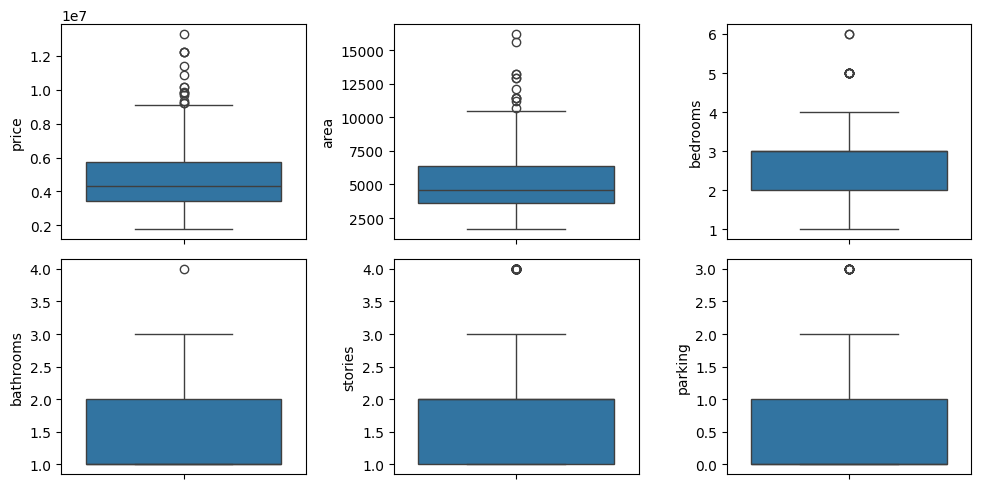

In [186]:
fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(df['price'], ax = axs[0,0])
plt2 = sns.boxplot(df['area'], ax = axs[0,1])
plt3 = sns.boxplot(df['bedrooms'], ax = axs[0,2])
plt1 = sns.boxplot(df['bathrooms'], ax = axs[1,0])
plt2 = sns.boxplot(df['stories'], ax = axs[1,1])
plt3 = sns.boxplot(df['parking'], ax = axs[1,2])

plt.tight_layout()

* As Price and area have considerable outliers.
* So we can simply drop the outliers from our dataset.

In [187]:
#removing outlier
z_scr = zscore(df[['price', 'area']])
threshold = 3
outlier_mask = (abs(z_scr) > threshold).any(axis=1)
newdf = df[~outlier_mask]
newdf
print("Total outlier mask:",outlier_mask.sum())

Total outlier mask: 13


In [188]:
print(df.shape)
print(newdf.shape)

(545, 13)
(532, 13)


Now we can see 13 rows have been removed

# EDA

Text(0.5, 1.0, 'Area')

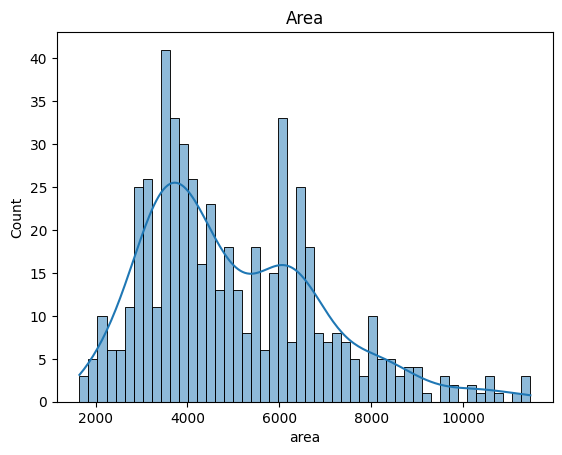

In [189]:
sns.histplot(x = newdf['area'],  kde = True, bins = 50).set_title('Area')

Text(0.5, 1.0, 'Price')

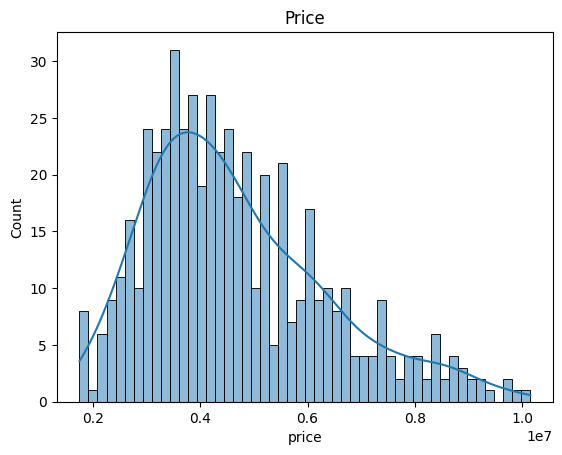

In [190]:
sns.histplot(x = newdf['price'],  kde = True, bins = 50).set_title('Price')

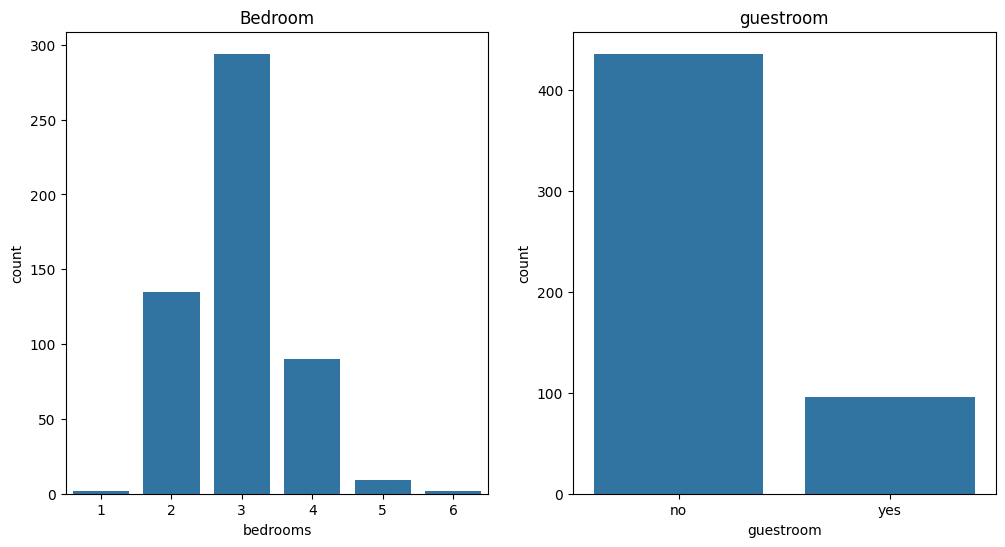

In [191]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.countplot(x='bedrooms', data=newdf, ax=axes[0]), axes[0].set_title('Bedroom')
sns.countplot(x='guestroom', data=newdf, ax=axes[1]), axes[1].set_title('guestroom')
plt.show()

Text(0.5, 1.0, 'Bathroom')

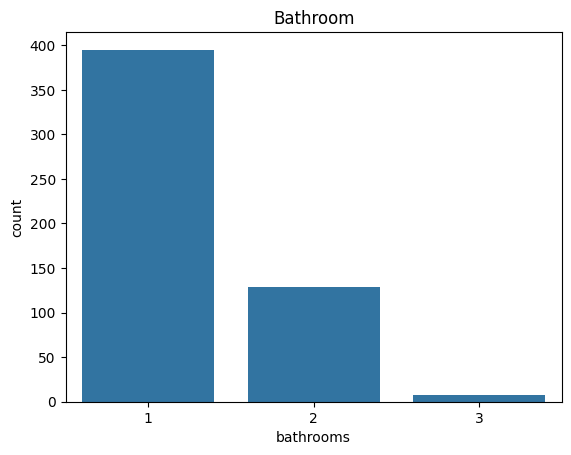

In [192]:
sns.countplot(x = 'bathrooms', data = newdf).set_title('Bathroom')

Text(0.5, 1.0, 'Furnishing')

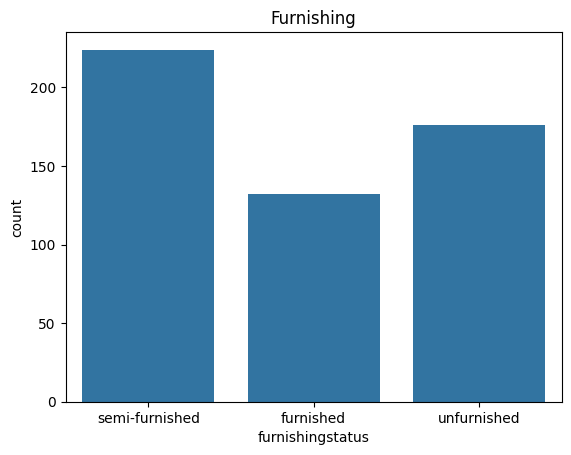

In [193]:
sns.countplot(x='furnishingstatus',data=newdf).set_title('Furnishing')

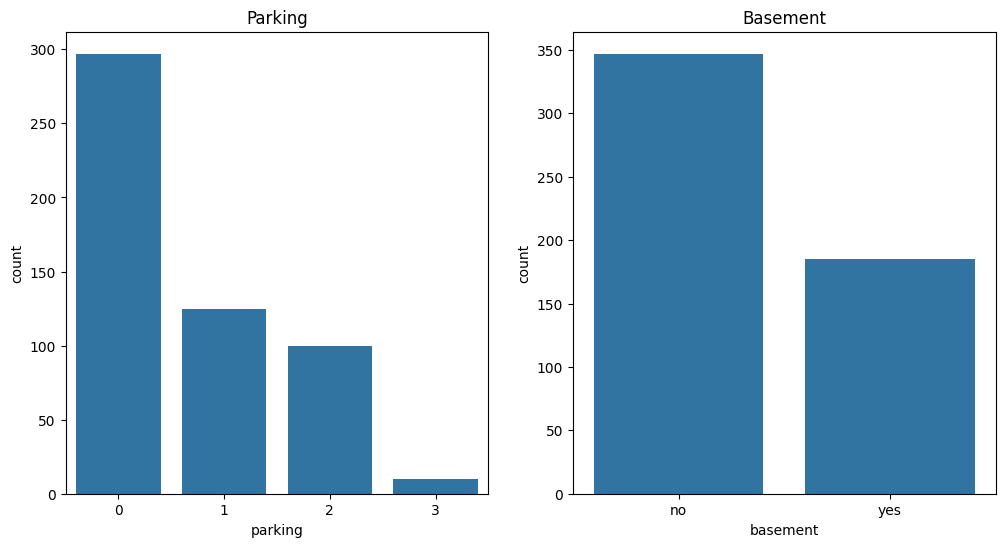

In [194]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.countplot(x='parking', data=newdf, ax=axes[0]), axes[0].set_title('Parking')
sns.countplot(x='basement', data=newdf, ax=axes[1]), axes[1].set_title('Basement')
plt.show()

Text(0.5, 1.0, 'Linked to Main road')

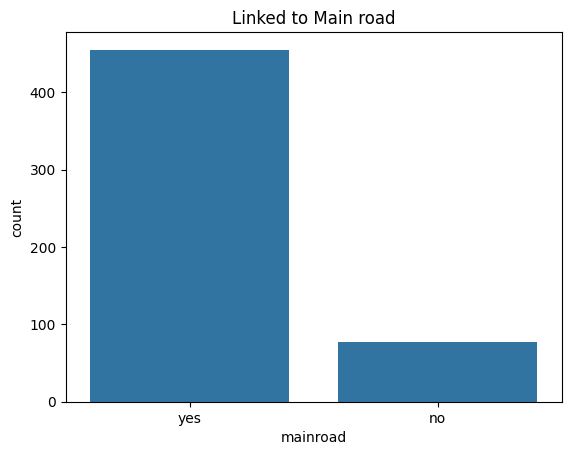

In [195]:
sns.countplot(x = 'mainroad', data = newdf).set_title('Linked to Main road')

<h3 align="left">Inferences:</h3> 

* The majority of properties in the dataset are located on main roads, with **468** out of 545 properties having this feature.
* A significant portion of properties do not have a guestroom, as indicated by the 448 entries where 'guestroom' is 'No'.
* Basements are not common among the properties, with only 191 out of 545 properties having this feature.
* The vast majority of properties do not have hot water heating, as evidenced by the 520 entries where 'hotwaterheating' is 'No'.
* Most properties do not have air conditioning, with 373 out of 545 properties lacking this feature.
* The preference for properties with a preferred area is relatively low, as indicated by the 417 entries where 'prefarea' is 'No'.
* Semi-furnished properties are the most common furnishing status among the dataset, with 227 out of 545 properties falling into this category.

Text(0.5, 1.0, 'Area VS Price')

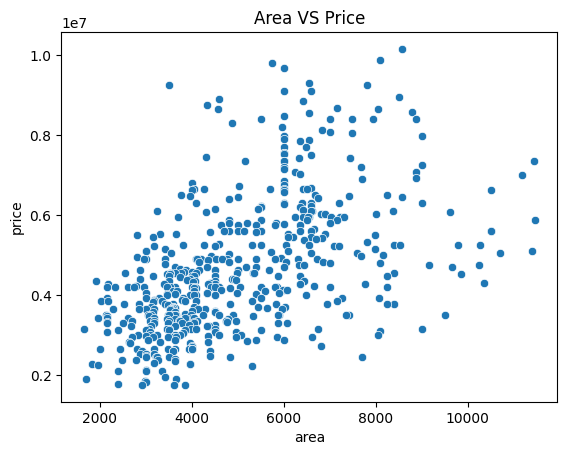

In [196]:
sns.scatterplot(x = 'area', y = 'price', data = newdf).set_title('Area VS Price')

# Data Preprocessing

In [197]:
# Encoding the categorical variables using replace
encode_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
newdf[encode_columns] = newdf[encode_columns].replace({'yes': 1, 'no': 0})
newdf.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
6,10150000,8580,4,3,4,1,0,0,0,1,2,1,semi-furnished
8,9870000,8100,4,1,2,1,1,1,0,1,2,1,furnished
9,9800000,5750,3,2,4,1,1,0,0,1,1,1,unfurnished
11,9681000,6000,4,3,2,1,1,1,1,0,2,0,semi-furnished
12,9310000,6550,4,2,2,1,0,0,0,1,1,1,semi-furnished


In [198]:
#Encoding the furnishingstatus column which contain 3 levels using get_dummies
furnish_sts = pd.get_dummies(newdf['furnishingstatus']).astype(int)
furnish_sts.head(5)

,furnished,semi-furnished,unfurnished
6,0,1,0
8,1,0,0
9,0,0,1
11,0,1,0
12,0,1,0


In [199]:
house_data = newdf.drop(['furnishingstatus'],axis = 1)
house_data = pd.concat([house_data,furnish_sts],axis = 1)
house_data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished,unfurnished
6,10150000,8580,4,3,4,1,0,0,0,1,2,1,0,1,0
8,9870000,8100,4,1,2,1,1,1,0,1,2,1,1,0,0
9,9800000,5750,3,2,4,1,1,0,0,1,1,1,0,0,1
11,9681000,6000,4,3,2,1,1,1,1,0,2,0,0,1,0
12,9310000,6550,4,2,2,1,0,0,0,1,1,1,0,1,0


Scaling:

* Normalization of Dataset

In [200]:
scaler = MinMaxScaler()
features_to_scale = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']
house_data[features_to_scale] = scaler.fit_transform(house_data[features_to_scale])
house_data.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished,unfurnished
6,1.000000,0.706422,0.6,1.0,1.000000,1,0,0,0,1,0.666667,1,0,1,0
8,0.966667,0.657492,0.6,0.0,0.333333,1,1,1,0,1,0.666667,1,1,0,0
9,0.958333,0.417941,0.4,0.5,1.000000,1,1,0,0,1,0.333333,1,0,0,1
11,0.944167,0.443425,0.6,1.0,0.333333,1,1,1,1,0,0.666667,0,0,1,0
12,0.900000,0.499490,0.6,0.5,0.333333,1,0,0,0,1,0.333333,1,0,1,0


Feature Selection

In [201]:
X= np.array(house_data.drop('price', axis=1))
y= np.array(house_data['price']).reshape(-1, 1)
print(X.shape)
print(y.shape)

(532, 14)
(532, 1)


In [230]:
from sklearn.model_selection import train_test_split

we will split dataSet into
* testing data is 30% 
* training data is 70%

In [203]:
np.random.seed(0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)



# Model Training - linear regression

In [205]:
#define parametes for grid search
parameter_grid={'n_features_to_select':[3,5,7,10]}

#initializing the model
model=LinearRegression() 
rfe=RFE(model) 

grid=GridSearchCV(estimator=rfe,param_grid=parameter_grid,scoring='neg_mean_squared_error',cv=5)
grid.fit(X_train,y_train)

best_features=grid.best_estimator_.n_features_to_select
print(f'Number of features to select: {best_features}')

Number of features to select: 10


Feature Selection

In [207]:
#feature selection
rfe_model=RFE(model,n_features_to_select=10)
X_train_rfe=rfe_model.fit_transform(X_train,y_train)
X_test_rfe=rfe_model.transform(X_test)


In [226]:
score = model.score(X_train_rfe, y_train)

print(score)

0.6223601601701805


In [227]:
coefficients = model.coef_

print(coefficients)

[[0.29147032 0.07859483 0.21571875 0.14323214 0.04931809 0.06551701
  0.13171599 0.09953661 0.06420773 0.06010973]]


In [228]:
#Fitting the model
model.fit(X_train_rfe,y_train)
y_pred = model.predict(X_test_rfe)
mse = mean_squared_error(y_test, y_pred)
r2=r2_score(y_test,y_pred)

Model Evaluation

In [229]:
print("Mean Squared Error:", mse)
print("R2 Score:",r2)

Mean Squared Error: 0.014001582239299126
R2 Score: 0.7087774150513453


<h3 align="left">Inferences:</h3> 
Our model is doing really well  in predicting the target variable.

* as evidenced by the low MSE (0.014), signifying accurate predictions across the dataset.
* The R-squared value of 0.708 indicates that approximately 70.88% of the variability in the target variable is accounted for by the model, underscoring its effectiveness in explaining the observed data.

In [212]:
data_frame = pd.DataFrame({'actual': y_test.flatten(), 'predicted': y_pred.flatten()})
data_frame.head()


,actual,predicted
0,0.891667,0.499075
1,0.108333,0.074492
2,0.508333,0.346253
3,0.108333,0.373609
4,0.158333,0.348315


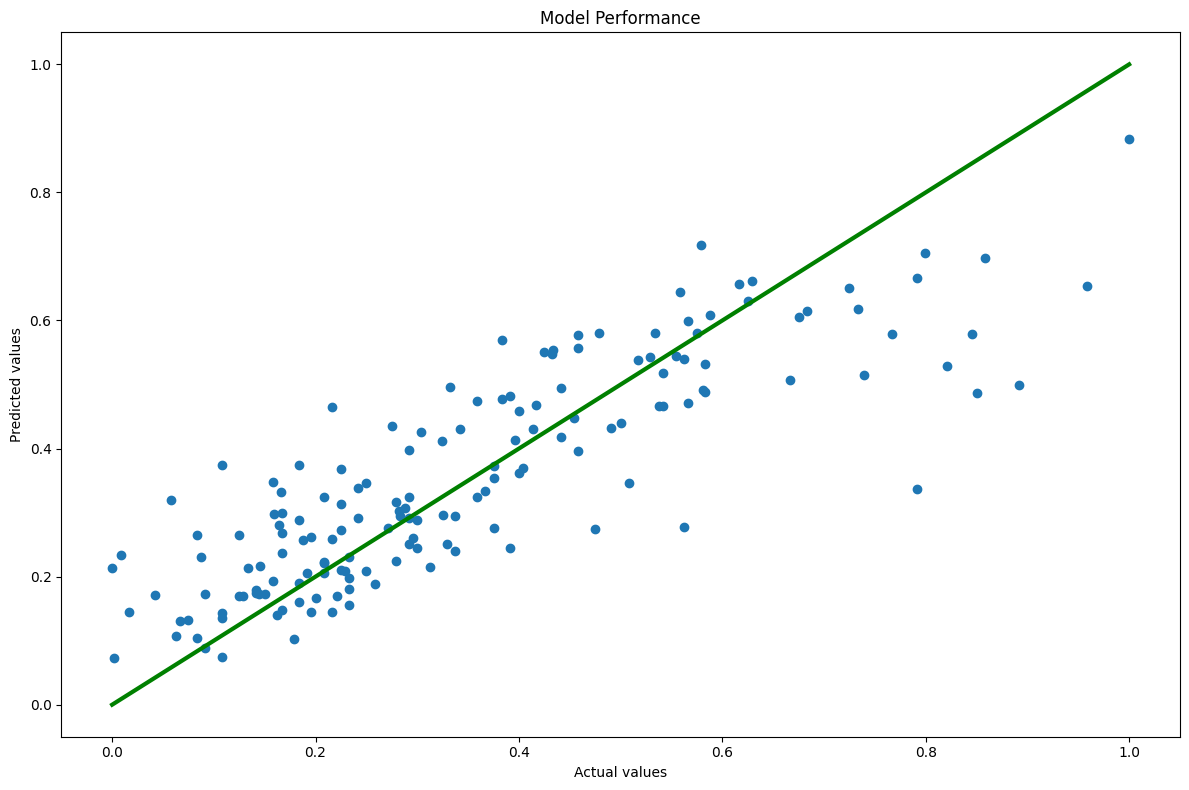

In [211]:
plt.figure(figsize=(12,8))
plt.scatter(y_test,y_pred)
plt.plot([min(y_test),max(y_test)],[min(y_test),max(y_test)],linewidth = 3,color='green')
plt.title('Model Performance')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

plt.tight_layout()
plt.show()